#**Introduction**

Walmart stakeholders have requested to see the relationship between historical store sales and historical socioeconomic factors to better understand how store sales are affected by those factors.

#**Data Origin and Overview**
Link to dl data: https://www.kaggle.com/aditya6196/retail-analysis-with-walmart-data/download

The dataset is from Kaggle.com and contains sales data from 45 Walmart stores ranging from 2010-02-05 to 2012-11-01, in the file WalmartStoresales.

Within this file you will find the following fields:
Store - the store number

*   Date - the week of sales
*   Weekly_Sales - sales for the given store
*   Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
*   Temperature - Temperature on the day of sale
*   Fuel_Price - Cost of fuel in the region
*   CPI – Prevailing consumer price index
*   Unemployment - Prevailing unemployment rate

#**Hypotheses**
* How are sales affected by unemployment rate?
* How are sales affected by consumer price index?
* How are sales affected by regional fuel prices?


---
##Sales & Unemployment rate

* **Hypothesis 1** = There is no statistically significant correlation between sales and unemployment. 

##Sales & CPI

* **Hypothesis 2** = There is no statistically significant correlation between sales and CPI

##Sales & Regional Fuel Prices

* **Hypothesis 3** = There is no statistically significant correlation between  sales and fuel prices

#**Load data from csv file into dataframe**
https://wlmolina.github.io/dataset_2-2010_to_11-2012_Walmart_Store_sales.csv

In [ ]:
#Install all required libraries
!pip install sqlalchemy
!pip install psycopg2
!pip install pandas-profiling

%matplotlib notebook 
from scipy import stats
from google.colab import drive
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from numpy import median
import pandas as pd
#import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
#drive.mount('/content/gdrive')
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load dataset into sales_df from csv file.
sales_df = pd.read_csv('https://wlmolina.github.io/dataset_2-2010_to_11-2012_Walmart_Store_sales.csv')
sales_df = sales_df.sort_values(['Weekly_Sales']).reset_index(drop=True)
sales_df['Date'] = pd.to_datetime(sales_df['Date']) #change Date columns to datetime type for easier splicing using dates
sales_df['Store'] = sales_df.Store.astype('category') #change Store column to categorical to splice by store

#**Exploring dataframe to view columns/rows information**

###I check for nulls and print out the dataframe information (shape, index info, and 5 rows) to determine what the data looks like, and how I can use it.
```
print(sales_df.shape)
print(sales_df.info())
print(sales_df.isnull().sum())
sales_df.head()

```

In [ ]:
#Print df information to explore data
print('--- shape ---')
print(sales_df.shape)
print('\n--- info ---')
print(sales_df.info())
print('\n--check nulls--')
print(sales_df.isnull().sum())
print('\n--- head ---')
sales_df.head()

--- shape ---
(6435, 8)

--- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 359.9 KB
None

--check nulls--
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

--- head ---


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265
1,33,2010-10-29,213538.32,0,71.34,3.130,126.436419,9.265
2,33,2011-12-30,215359.21,1,51.60,3.428,130.071032,8.010
3,33,2010-12-31,219804.85,1,52.91,3.148,127.087677,9.265
4,33,2011-02-12,220060.35,0,59.12,3.701,129.845967,8.010


#**Explore distribution of variables**

---


##Histograms of sales, unemployment rate, CPI, and fuel prices
I'm looking at the distributions of the variables. I'm checking to see if they're normal, or close to it, in order to perform data analysis 

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

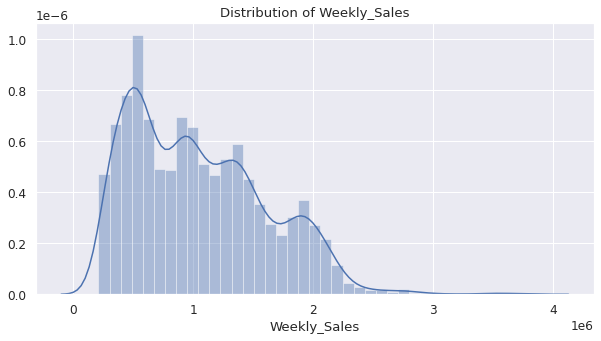

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

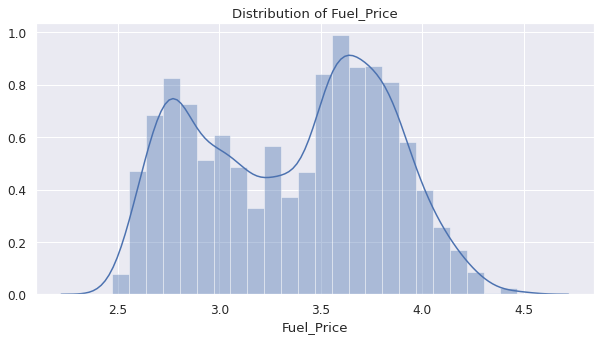

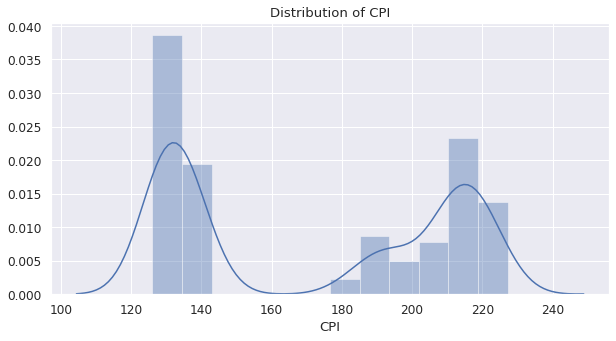

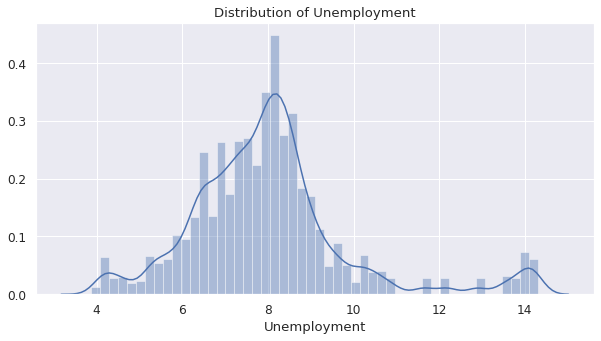

In [ ]:
sales_col = sales_df.columns
sns.set(font_scale=1.1)
for cols in sales_col:
  plt.figure(figsize=(10,5)) #change the dimension of the graph
  if cols != 'Holiday_Flag' and cols != 'Date' and cols != 'Store' and cols != 'Temperature': #don't show graphs for Holiday_Flags, Date, or Store variables
    plt.title("Distribution of "+cols)
    sns.distplot(sales_df[cols]) #create histogram from variable(column)
    plt.show() #updates the graph with visual changes like titles etc
  else:
    pass

#**Method & Analysis**

---


##Statistical Correlation Analysis
Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. 
Pearson's correlation coefficient (r) is a measure of the strength of the association between the two variables


##Pairplot of sales and unemployment

---
This pairplot explores the correlation possiblity between sales and unemployment. 



<Figure size 720x360 with 0 Axes>

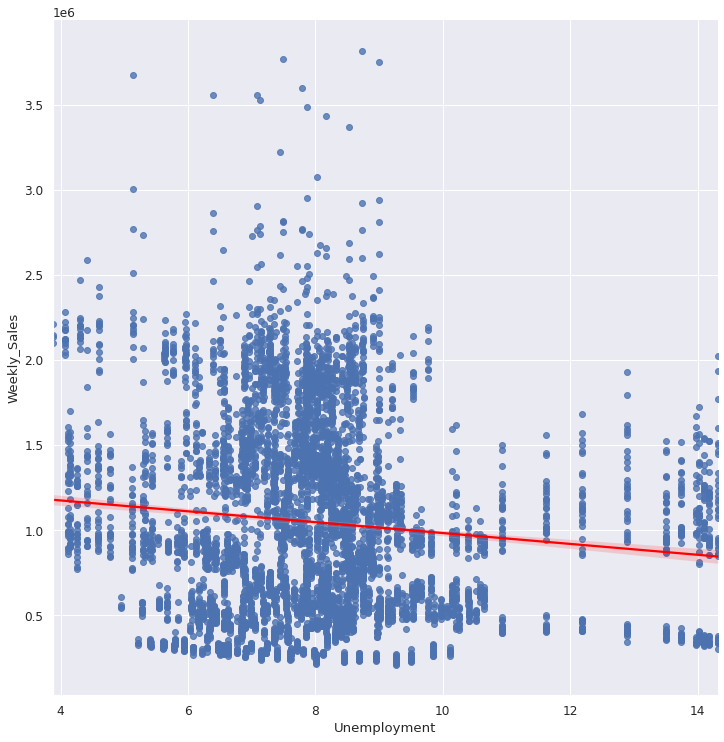

In [ ]:
#set scatterplot parameters and show graph
plt.figure(figsize=(10,5)) #set graph dimensions
ax = sns.pairplot(data=sales_df, y_vars=['Weekly_Sales'], x_vars= ['Unemployment'], kind='reg', height = 10,plot_kws={'line_kws':{'color':'red'}})
plt.show()

###<b>Sales & Unemployment?

There appears to be a negative pearsons coefficient, and that there's some kind of correlation between sales and unemployment.

---



##Pairplot of sales and CPI (consumer price index)

---
<b>This pairplot explores the possible relationship between sales and CPI (consumer price index)


<Figure size 720x360 with 0 Axes>

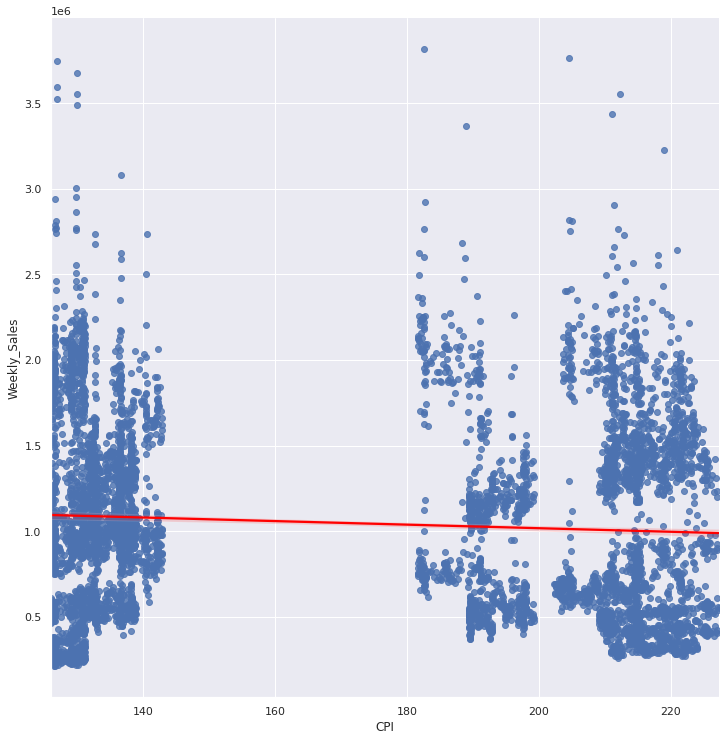

In [ ]:
#set pairplot parameters and show graph
sns.set()
plt.figure(figsize=(10,5)) #set graph dimensions
ax = sns.pairplot(data=sales_df, y_vars=['Weekly_Sales'], x_vars= ['CPI'], kind='reg', height = 10,plot_kws={'line_kws':{'color':'red'}})
plt.show()

###<b>Sales & CPI correlation?

There seems to be a very weak reltationship between sales and CPI, but it does look like there exists some correlation

---



##Pairplot of sales and regional fuel prices

---

<b>This pairplot explores if there's any relationship between sales and regional fuel prices


<Figure size 720x360 with 0 Axes>

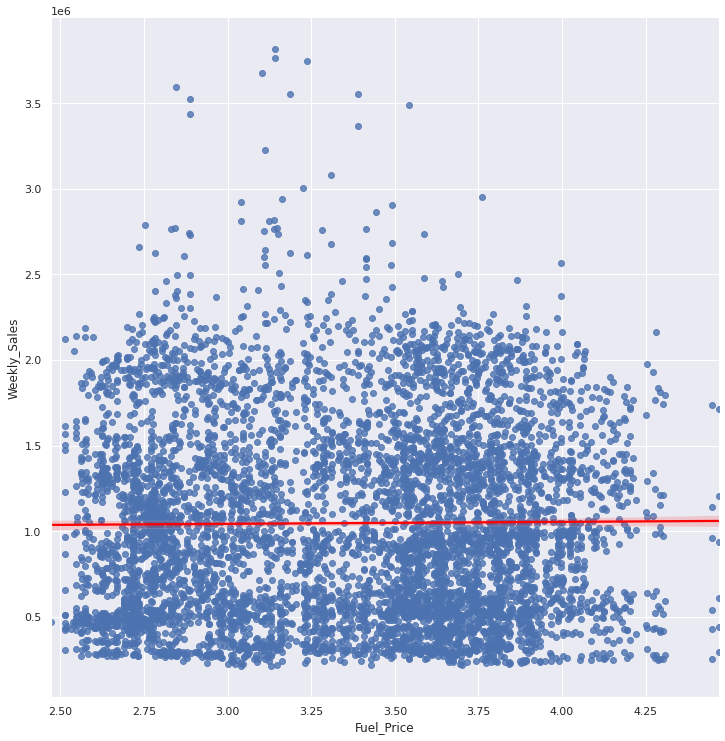

In [ ]:
#set scatterplot parameters and show graph
sns.set()
plt.figure(figsize=(10,5)) #set graph dimensions
ax = sns.pairplot(data=sales_df, y_vars=['Weekly_Sales'], x_vars= ['Fuel_Price'], kind='reg', height = 10,plot_kws={'line_kws':{'color':'red'}})
plt.show()

###<b>Sales & Fuel Correlation? </b> 
There appears to be no relationship between sales and regional fuel costs**

---



#<b>Pearson's r Coefficient test</b>

---

The Pearson's r will generate the pearson correlation coefficent, and a P-value to determine if there any statiscally siginificant correlation

##**Pearson's r test on sales & unemployment**

In [ ]:
#performing pearsonr test on Weekly_Sales and Unemployment
print("Pearsonr correlation test on Weekly Sales and Unemployment")
print('-----------------------------------------------------------')
stats.pearsonr(sales_df.Weekly_Sales,sales_df.Unemployment)

Pearsonr correlation test on Weekly Sales and Unemployment
-----------------------------------------------------------


(-0.1061760896579542, 1.3448365210357873e-17)

(-0.1061760896579542, 1.3448365210357873e-17)<br>
<b>Analysis: There is a negative coefficient, and the p.value < 0.05

##**Pearson's r test on sales & CPI**

In [ ]:
#performing pearsonr test on Weekly_Sales and Fuel Prices
print("Pearsonr correlation test on sales & regional sales prices")
print('-----------------------------------------------------------')
stats.pearsonr(sales_df.Weekly_Sales,sales_df.CPI)
#sales_df.corr(method="pearson", min_periods=20)["Fuel_Price"].abs().sort_values(ascending=False)

Pearsonr correlation test on sales & regional sales prices
-----------------------------------------------------------


(-0.0726341620401763, 5.438292612224682e-09)

(-0.0726341620401763, 5.438292612224682e-09)<br>
<b>Analysis: There is a weak negative coefficient and a p.value < 0.05

##**Pearson's r test on sales & regional fuel prices**

In [ ]:
#performing pearsonr test on Weekly_Sales and Fuel Prices
print("Pearsonr correlation test on Weekly Sales and Fuel Prices")
print('-----------------------------------------------------------')
stats.pearsonr(sales_df.Weekly_Sales,sales_df.Fuel_Price)
#sales_df.corr(method="pearson", min_periods=20)["Fuel_Price"].abs().sort_values(ascending=False)

Pearsonr correlation test on Weekly Sales and Fuel Prices
-----------------------------------------------------------


(0.009463786314475139, 0.44782874895250047)

(0.009463786314475139, 0.44782874895250047)<br>
<b>Analysis: The coefficient is almost 0, and the p.value > 0.05

#<b>Conclusion & Recommendation

##**Analysis Conclusion**


---


##**Do sales have any correlation with unemployment?**
###A: There appears to be a negative statistical correlation between sales and unemployment.**
* (coefficient = -0.10617, P.Value < .05)
* <b>We REJECT the Null Hypothesis that there's no significant statistical correlation between weekly sales and unemployment.</b>

##**Does regional fuel price have a correlation with sales?**
###A: It seems there's a neutral coefficiant and no statistical correlation between sales and regional fuel prices**
* (Coefficient = 0.00946, P.values > 0.05)
* <b>We FAIL TO REJECT the Null Hypothesis that there's no significant statistical correlation between Weekly Sales and Fuel Prices</b>

##**Does the CPI have a correlation with sales?**
###A: There appears to be a weak negative correlation between sales and CPI
* (Coefficient = 0.00946, P.values > 0.05)
* <b>We FAIL TO REJECT the Null Hypothesis that there's no significant statistical correlation between Weekly Sales and Fuel Prices</b>


##**Recommendation**

---
* It appears that unemployment and CPI have correlation with store sales
* Also appears no correlation exists between sales and regional fuel prices.

<B>Unemployment & CPI:</b>

When socioeconomic factors such as unemployment rate or CPI are projected to change, stores should adjust inventory odering amounts accordingly to the projected socioeconomic changes.

